# US Banks' Stock Performance 

This data project will be an exploratory data analysis of stock prices. It will focus on US bank stock and how they progressed throughout the finacial crisis all the way to early 2016.

The 6 banks that I will be focusing on are: 
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

## Getting the Data

In this section I'll be using pandas datareader to directly read data from Tiingo's API. Tiingo is a stock tracing platform that provides a data api with historical end-of-day prices on equities, mutual funds and ETFs.

The first steps are to import the needed libraries and the TiingoClient so that I can setup my personal API Key, so that I may send requests for the needed stock data.

In [3]:
import numpy as np
import pandas as pd

In [4]:
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = '57ed6bebb3a2765ab7b1a272f1351a8df705ea85'

client = TiingoClient(config)

In [6]:
import pandas_datareader as pdr
import datetime

In [7]:
#Establishing the bank ticker symbols I will be analyzing and taking a quick look at the metadata for these stocks.

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

dict_list = []
for tick in tickers:
    dict_banks = client.get_ticker_metadata(tick)
    dict_list.append(dict_banks)

bank_metadata = pd.DataFrame(dict_list) 
bank_metadata

,ticker,name,description,startDate,endDate,exchangeCode
0,BAC,Bank Of America Corp,Bank of America Institute is dedicated to unco...,1986-05-29,2023-04-14,NYSE
1,C,Citigroup Inc,Citi is one of the world's largest financial i...,1977-01-03,2023-04-14,NYSE
2,GS,Goldman Sachs Group Inc,Goldman Sachs is a leading global financial in...,1999-05-04,2023-04-14,NYSE
3,JPM,JPMorgan Chase & Company,JPMorgan Chase & Co. is a leading financial se...,1983-12-30,2023-04-14,NYSE
4,MS,Morgan Stanley,"Morgan Stanley Wealth Management, a global lea...",1993-02-23,2023-04-14,NYSE
5,WFC,Wells Fargo & Company,Wells Fargo & Company is a leading financial s...,1972-06-01,2023-04-14,NYSE


In [8]:
#Establishing the start and end dates for the timeframe I will be looking at, using datetime.

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [9]:
#Reading the stock data for each bank into variables using pandas DataReader and the Tiingo API

#Bank of America
BAC = pdr.get_data_tiingo('BAC', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')

#CitiGroup
C = pdr.get_data_tiingo('C', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')

#Goldman Sachs
GS = pdr.get_data_tiingo('GS', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')

#JPMorgan Chase
JPM = pdr.get_data_tiingo('JPM', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')

#Morgan Stanley
MS = pdr.get_data_tiingo('MS', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')


#Wells Fargo
WFC = pdr.get_data_tiingo('WFC', start, end, api_key='57ed6bebb3a2765ab7b1a272f1351a8df705ea85')

C:\Users\Darius\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\Darius\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\Darius\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\Darius\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)
C:\Users\Darius\anaconda3\lib\si

In [10]:
#Cleaning up the dataframes to create common indecies for concatenation

BAC.reset_index(inplace=True)
BAC.drop('symbol', axis=1, inplace=True)
BAC.set_index('date', inplace=True)

C.reset_index(inplace=True)
C.drop('symbol', axis=1, inplace=True)
C.set_index('date', inplace=True)

GS.reset_index(inplace=True)
GS.drop('symbol', axis=1, inplace=True)
GS.set_index('date', inplace=True)

JPM.reset_index(inplace=True)
JPM.drop('symbol', axis=1, inplace=True)
JPM.set_index('date', inplace=True)

MS.reset_index(inplace=True)
MS.drop('symbol', axis=1, inplace=True)
MS.set_index('date', inplace=True)

WFC.reset_index(inplace=True)
WFC.drop('symbol', axis=1, inplace=True)
WFC.set_index('date', inplace=True)

In [11]:
#Creating the dataframe that will be the basis for the rest of my analysis

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

bank_stocks.head()

Bank Ticker                  BAC                                            \
Stock Info                 close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  31.359042   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  31.026002   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  31.065967   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  31.019342   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  31.039324   

Bank Ticker                                                           ...  \
Stock Info                   adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  31.425650  30.739588  31.252470  16296700  ...   
2006-01-04 00:00:00+00:00  31.465615  30.939412  31.305756  17757900  ...   
2006-01-05 00:00:00+00:00  31.192522  30.852822  31.026002  14970700  ...   
2006-01-06 00:00:00+00:00  31.245809  30.872804  31.172540  12599800  ...   
2006-01-09 00:00:00+00:00  31.285774  30.879465  31.119254  15619400  ...   

Bank Ticker                  WFC                                        \
Stock Info                   low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  19.800943  19.847497   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  19.571277  19.751285   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  19.549552  19.586795   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  19.664385  19.723353   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  19.661281  19.754389   

Bank Ticker                                                                    
Stock Info                    adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  19.363336  19.614727  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  19.468858  19.738871  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  19.434719  19.552655  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  19.481272  19.602313   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  19.586795  19.661281   5619600     0.0         1.0  

[5 rows x 72 columns]

## Exploratory Data Analysis

In [12]:
#Finding the max close price for each bank's stock throughout the time period
bank_stocks.xs('close', axis=1, level=1).max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

In [13]:
#Creating a new dataframe that will contain the returns for each bank's stock

Returns = pd.DataFrame()

for tick in tickers:
    Returns[tick + ' Return'] = bank_stocks[tick]['close'].pct_change()

Returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


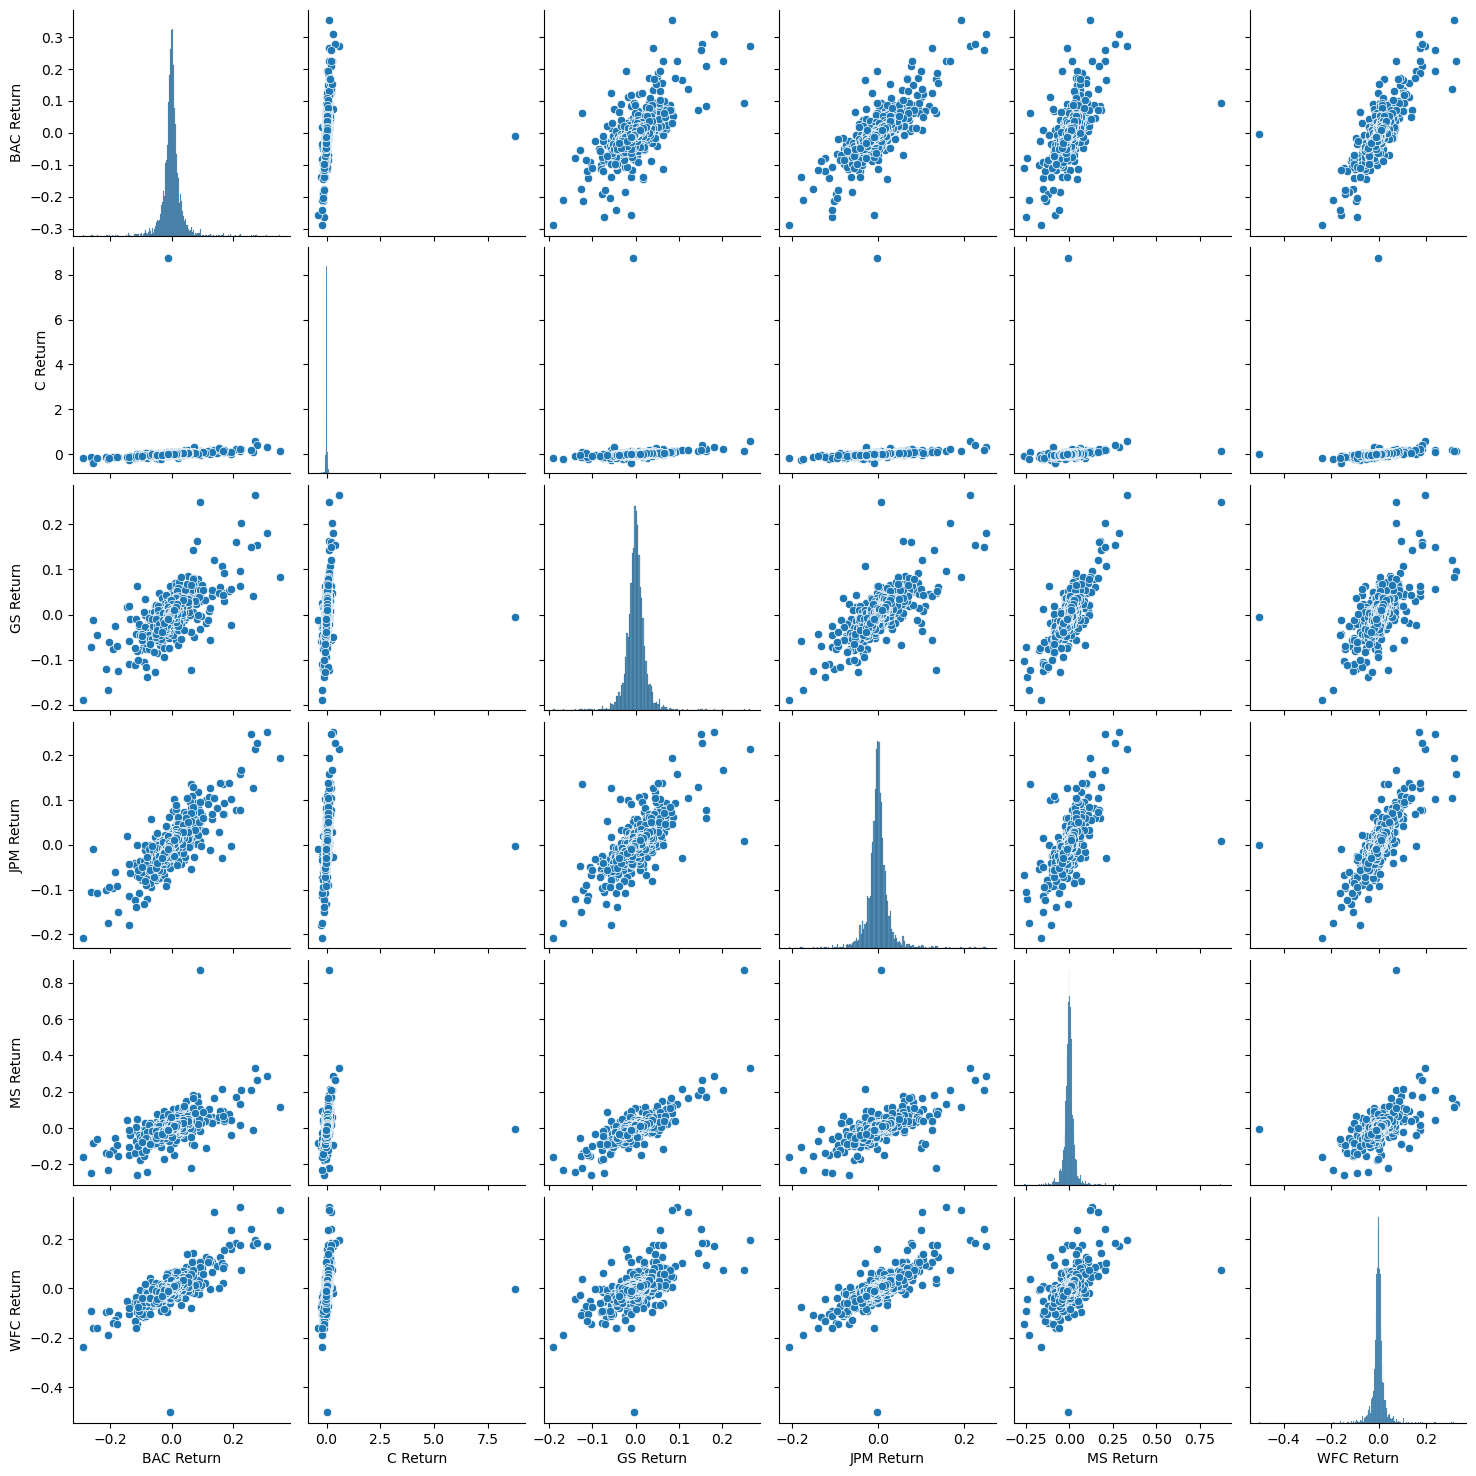

In [14]:
#Creating a pairplot of the returns dataframe

import seaborn as sns
%matplotlib inline
sns.pairplot(Returns[1:])

We can see in the above paitplot that there is something odd about plots with Citigroup on either axis. It looks like there is an outlier in the bank's daily returns, with one day yeilding a huge return. We can explore this further.

Below we check the dates in which each bank had their best and worst single day returns. 

You will notice that 4 of the banks share the same day for the worst drop: January 20, 2009. This was Barack Obama's first Inauguration day. Pulled from a [Reuters article](https://www.reuters.com/article/us-markets-stocks-idUSTRE50J4SJ20090120), the reason for this was due to "High expectations for details on how the new administration would address the growing banking crisis and faltering economy were dampened after the inauguration speech concluded with little new information to digest."

In [15]:
Returns.idxmin()

BAC Return   2009-01-20 00:00:00+00:00
C Return     2009-02-27 00:00:00+00:00
GS Return    2009-01-20 00:00:00+00:00
JPM Return   2009-01-20 00:00:00+00:00
MS Return    2008-10-09 00:00:00+00:00
WFC Return   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

Looking at the dates of the bank's greatest one day returns, we can do some research to find out the origin of Citigroup's outlier data point. 

After many of the other banks had recovered from the banking crisis, Citigroup's stock continued to trade around $1 per share. According to a [CNN article](https://money.cnn.com/2011/03/21/news/companies/citigroup_reverse_stock_split/index.htm), "Citigroup on Monday announced a 1-for-10 reverse stock split of the company's common shares, and the bank will also reinstate its quarterly dividend." It would begin trading on a split-adjusted basis starting May 9, the date we see below.

In [16]:
Returns.idxmax()

BAC Return   2009-04-09 00:00:00+00:00
C Return     2011-05-09 00:00:00+00:00
GS Return    2008-11-24 00:00:00+00:00
JPM Return   2009-01-21 00:00:00+00:00
MS Return    2008-10-13 00:00:00+00:00
WFC Return   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

By finding the standard deviation of the returns for each stock, we can classify which bank would have been the riskiest investment over a certain time period. 

Over the entire timeframe, Citigroup would be the riskiest.

In the year of 2015, Morgan Stanley and Bank of America would be the riskiest with very similar risk profiles.

In [17]:
Returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037821
WFC Return    0.031838
dtype: float64

In [18]:
Returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

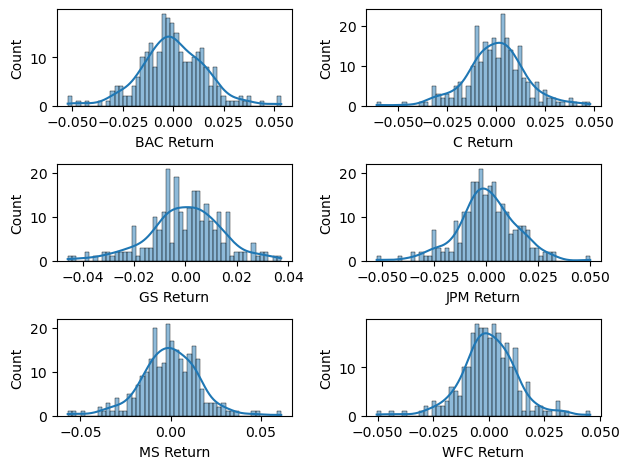

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=3)

sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['BAC Return'], bins=50, kde=True, ax=axs[0][0])
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['C Return'], bins=50, kde=True, ax=axs[0][1])
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['GS Return'], bins=50, kde=True, ax=axs[1][0])
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['JPM Return'], bins=50, kde=True, ax=axs[1][1])
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=50, kde=True, ax=axs[2][0])
sns.histplot(Returns.loc['2015-01-01':'2015-12-31']['WFC Return'], bins=50, kde=True, ax=axs[2][1])

plt.tight_layout()
plt.show()

## More Visualizations

In [20]:
import plotly
import cufflinks as cf
cf.go_offline()

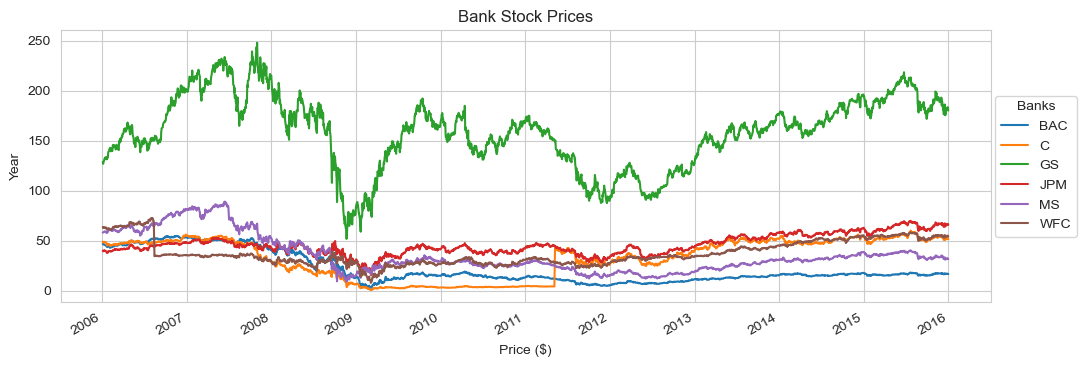

In [21]:
sns.set_style('whitegrid')

for tick in tickers:
    bank_stocks[tick]['close'].plot(figsize=(12,4),label=tick)

plt.legend(title='Banks' ,loc='center right', bbox_to_anchor=(1.1,0.5))
plt.title('Bank Stock Prices')
plt.xlabel('Price ($)')
plt.ylabel('Year')
plt.show()

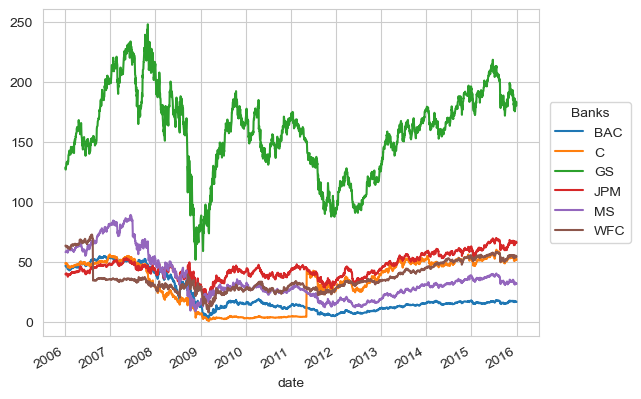

In [22]:
bank_stocks.xs('close', axis=1, level='Stock Info').plot()
plt.legend(title='Banks' ,loc='center right', bbox_to_anchor=(1.2,0.5))

In [23]:
bank_stocks.xs('close', axis=1, level=1).iplot()

<AxesSubplot:xlabel='date'>

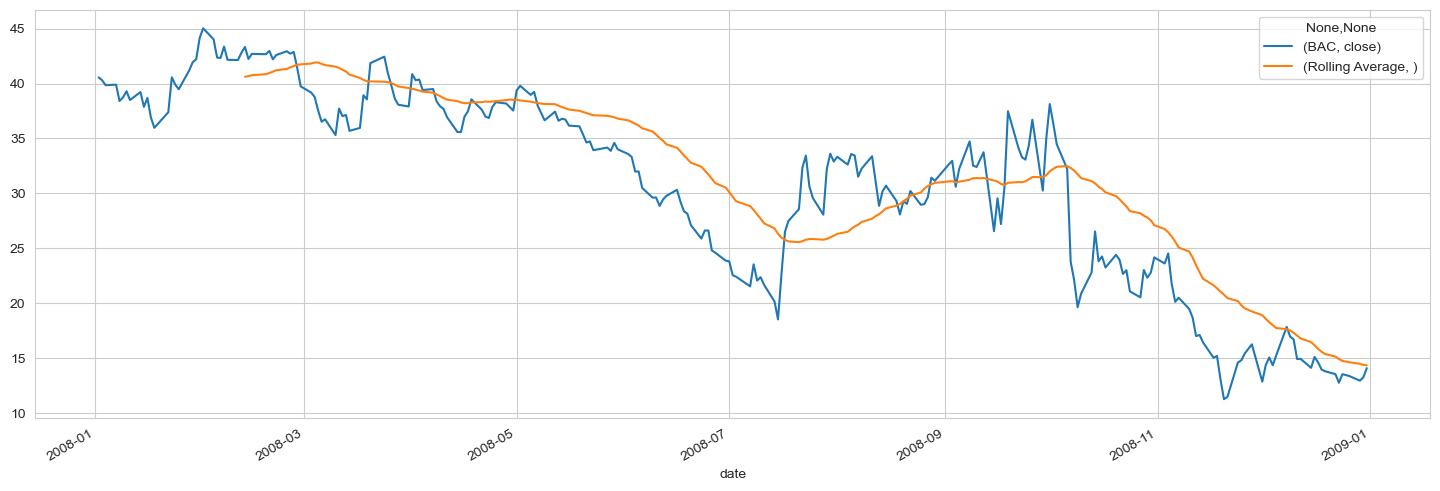

In [24]:
bac_prices = bank_stocks.loc['2008-01-01':'2008-12-31']['BAC', 'close'].to_frame()
bac_prices['Rolling Average'] = bac_prices['BAC']['close'].rolling(30).mean()
bac_prices.plot(figsize=(18,6))

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

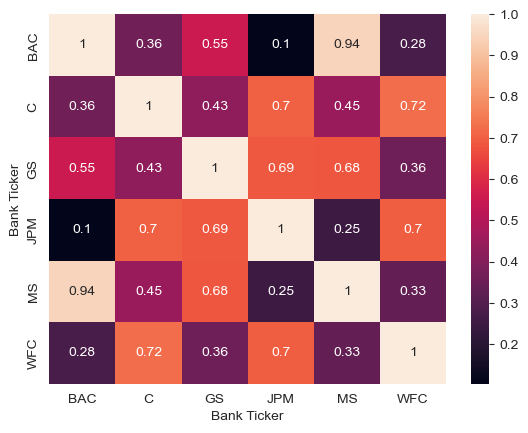

In [25]:
sns.heatmap(bank_stocks.xs('close', axis=1, level=1).corr(), annot=True)

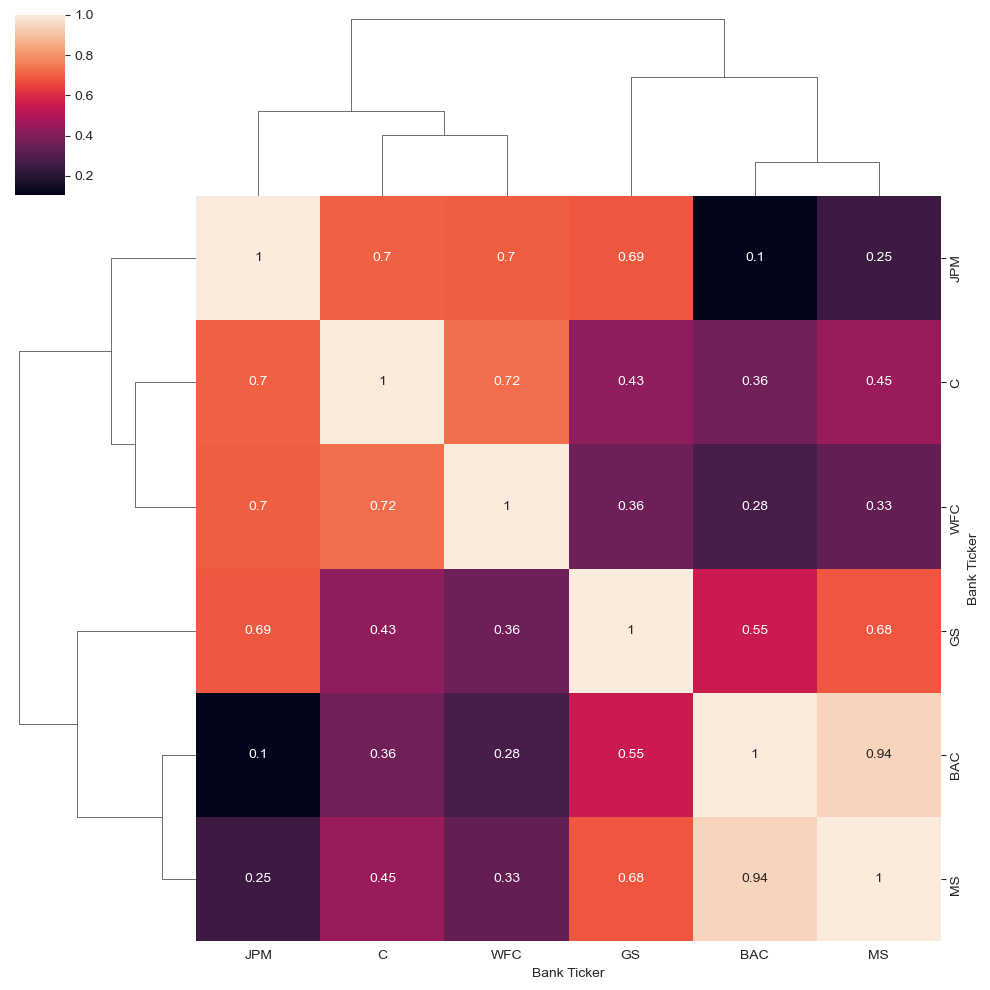

In [26]:
sns.clustermap(bank_stocks.xs('close', axis=1, level=1).corr(), annot=True)

In [27]:
close_corr = bank_stocks.xs('close', axis=1, level=1).corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

## Technical Analysis

In [28]:
#Creating a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

bac_stock = bank_stocks.loc['2015-01-01':'2015-12-31']['BAC']
bac_stock.iplot(kind='candle')

In [29]:
#Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015

ms_stock = bank_stocks.loc['2015-01-01':'2015-12-31']['MS', 'close']
ms_stock.ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [30]:
#Creating a Bollinger Band Plot for Bank of America for the year 2015

bac_stock['close'].ta_plot(study='boll', colors=['magenta'])